# Matrix Chain Multiplication

In [2]:
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline
import unittest
import numpy as np
import pandas as pd
import sys

#### RECURSION 

In [3]:
def matrix_chain_recursive(p, i, j,calls=0):
    calls += 1
    if i == j:
        return 0,calls
    min_cost = float('inf')
    for k in range(i, j):
        cost, calls = matrix_chain_recursive(p, i, k, calls)
        cost2, calls = matrix_chain_recursive(p, k + 1, j, calls)
        calls += 1
        cost += cost2 + p[i-1] * p[k] * p[j]
        if cost < min_cost:
            min_cost = cost
    return min_cost, calls



#### Top Down Using Memoization

In [4]:
def matrix_chain_memoization(p):
    n = len(p) - 1
    memo = [[-1 for _ in range(n)] for _ in range(n)]

    def helper(i, j, calls=0):
        calls += 1
        if i == j:
            return 0, calls
        if memo[i][j] != -1:
            return memo[i][j], calls
        min_cost = float('inf')
        for k in range(i, j):
            cost, calls = helper(i, k, calls)
            cost2, calls = helper(k + 1, j, calls)
            cost += cost2 + p[i-1] * p[k] * p[j]
            if cost < min_cost:
                min_cost = cost
        memo[i][j] = min_cost
        return min_cost, calls

    return helper(0, n-1)


#### Bottom Up Approuch

In [5]:
def matrix_chain_bottom_up(p):
    n = len(p) - 1
    dp = [[0 for _ in range(n)] for _ in range(n)]
    calls = 0

    for chain_length in range(2, n+1):
        for i in range(1, n - chain_length + 2):
            j = i + chain_length - 1
            dp[i-1][j-1] = float('inf')
            for k in range(i, j):
                cost = dp[i-1][k-1] + dp[k][j-1] + p[i-1] * p[k] * p[j]
                if cost < dp[i-1][j-1]:
                    dp[i-1][j-1] = cost
                calls += 1

    return dp[0][n-1], calls

In [6]:
# data_sizes = [10, 20, 30, 40, 50]

# for n in data_sizes:
#     dimensions = [10] * n  # Adjust the dimensions as needed
#     print(f"Data Size: {n}")
    
#     # Recursive Algorithm
#     start_time = time.perf_counter()
#     result, calls = matrix_chain_recursive(dimensions, 1, n-1)
#     end_time = time.perf_counter()
#     print(f"Recursive Algorithm - Time: {end_time - start_time}, Calls: {calls}")
    
#     # Recursive with Memoization
#     start_time = time.perf_counter()
#     result, calls = matrix_chain_memoization(dimensions)
#     end_time = time.perf_counter()
#     print(f"Memoization - Time: {end_time - start_time}, Calls: {calls}")
    
#     # Bottom-Up DP
#     start_time = time.perf_counter()
#     result, calls = matrix_chain_bottom_up(dimensions)
#     end_time = time.perf_counter()
#     print(f"Bottom-Up DP - Time: {end_time - start_time}, DP Table Entries: {calls}\n")


Data Size: 10
Recursive Algorithm - Time: 0.0029990673065185547, Calls: 9841
Memoization - Time: 0.0, Calls: 241
Bottom-Up DP - Time: 0.0, DP Table Entries: 120

Data Size: 20
Recursive Algorithm - Time: 110.45915484428406, Calls: 581130733
Memoization - Time: 0.001010894775390625, Calls: 2281
Bottom-Up DP - Time: 0.0, DP Table Entries: 1140

# Analysis

In [26]:
import time
import random

data_sizes = [5,7,9,11,13,15]
execution_times_recursive = []
execution_times_memoization = []
execution_times_bottom_up = []
total_calls_recursive = []
total_calls_memoization = []
total_calls_bottom_up = []
total_dp_recursive = []
total_dp_memoization = []
total_dp_bottom_up = []
array_used = []
for n in data_sizes:
    
    
    dimensions = [random.randint(1,100) for i in range(n)]
    print(f"Data Size: {n}")
    array_used.append(dimensions)
    # Recursive Algorithm
    
    start_time = time.perf_counter()
    result, calls = matrix_chain_recursive(dimensions, 1, n-1)
    end_time = time.perf_counter()
    print(f"Recursive Algorithm - Time: {end_time - start_time}, Calls: {calls}")
    execution_times_recursive.append(end_time - start_time)
    total_calls_recursive.append(calls)
    total_dp_recursive.append(calls)

    # Recursive with Memoization
    start_time = time.perf_counter()
    result, calls = matrix_chain_memoization(dimensions)
    end_time = time.perf_counter()
    print(f"Memoization - Time: {end_time - start_time}, Calls: {calls}")
    execution_times_memoization.append(end_time - start_time)
    total_calls_memoization.append(calls)
    total_dp_memoization.append(calls)
    total_calls_bottom_up.append(calls)

    # Bottom-Up DP
    start_time = time.perf_counter()
    result, calls = matrix_chain_bottom_up(dimensions)
    end_time = time.perf_counter()
    print(f"Bottom-Up DP - Time: {end_time - start_time}, DP Table Entries: {calls}\n")
    execution_times_bottom_up.append(end_time - start_time)
    
    
    total_dp_bottom_up.append(calls)
    
    


print(f"The Arrays used :")
for i in array_used:
    print(f"Size {len(i)} : {i}")

Data Size: 5
Recursive Algorithm - Time: 2.6300000172341242e-05, Calls: 40
Memoization - Time: 2.1100000594742596e-05, Calls: 21
Bottom-Up DP - Time: 1.639999754843302e-05, DP Table Entries: 10

Data Size: 7
Recursive Algorithm - Time: 0.0001190999973914586, Calls: 364
Memoization - Time: 3.780000042752363e-05, Calls: 71
Bottom-Up DP - Time: 2.9599999834317714e-05, DP Table Entries: 35

Data Size: 9
Recursive Algorithm - Time: 0.0009017999982461333, Calls: 3280
Memoization - Time: 7.449999975506216e-05, Calls: 169
Bottom-Up DP - Time: 0.0002870999996957835, DP Table Entries: 84

Data Size: 11
Recursive Algorithm - Time: 0.00831109999853652, Calls: 29524
Memoization - Time: 0.00017610000213608146, Calls: 331
Bottom-Up DP - Time: 0.00011699999959091656, DP Table Entries: 165

Data Size: 13
Recursive Algorithm - Time: 0.07469940000009956, Calls: 265720
Memoization - Time: 0.0003007000013894867, Calls: 573
Bottom-Up DP - Time: 0.00015949999942677096, DP Table Entries: 286

Data Size: 15
Re

### DataFrame of Execution Times vs Input size

In [27]:
data1 = list()
data_sizes= np.array(data_sizes)
for i in range(len(execution_times_bottom_up)):
    data1.append([execution_times_recursive[i],execution_times_memoization[i],execution_times_bottom_up[i]])
df = pd.DataFrame(data1,columns=['execution_times_recursive','execution_times_memoization','execution_times_bottom_up'])
df.set_index(data_sizes,inplace=True)
df

,execution_times_recursive,execution_times_memoization,execution_times_bottom_up
5,0.000026,0.000021,0.000016
7,0.000119,0.000038,0.000030
9,0.000902,0.000074,0.000287
11,0.008311,0.000176,0.000117
13,0.074699,0.000301,0.000159
15,0.686330,0.000353,0.000193


### DataFrame of Total Fn Calls vs Input size

In [28]:
data2 = list()
data_sizes= np.array(data_sizes)
for i in range(len(total_calls_recursive)):
    data2.append([total_calls_recursive[i],total_calls_memoization[i],total_calls_bottom_up[i]])
df = pd.DataFrame(data2,columns=['total_calls_recursive','total_calls_memoization','total_calls_bottom_up'])
df.set_index(data_sizes,inplace=True)
df



,total_calls_recursive,total_calls_memoization,total_calls_bottom_up
5,40,21,21
7,364,71,71
9,3280,169,169
11,29524,331,331
13,265720,573,573
15,2391484,911,911


### DataFrame of Total DP Table Calls vs Input size

In [29]:
data3 = list()
data_sizes= np.array(data_sizes)
for i in range(len(total_calls_recursive)):
    data3.append([total_dp_recursive[i],total_dp_memoization[i],total_dp_bottom_up[i]])
df = pd.DataFrame(data3,columns=['total_dp_recursive','total_dp_memoization','total_dp_bottom_up'])
df.set_index(data_sizes,inplace=True)
df

,total_dp_recursive,total_dp_memoization,total_dp_bottom_up
5,40,21,10
7,364,71,35
9,3280,169,84
11,29524,331,165
13,265720,573,286
15,2391484,911,455


In [11]:
total_dp_recursive

[40, 364, 3280, 29524, 265720, 2391484]

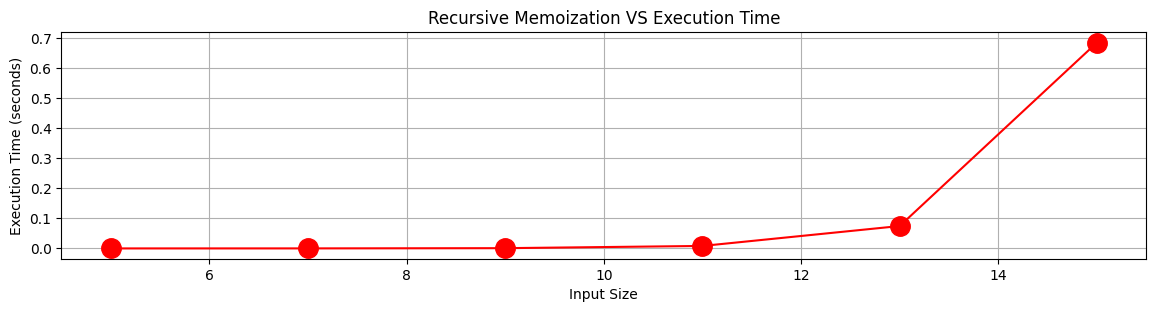

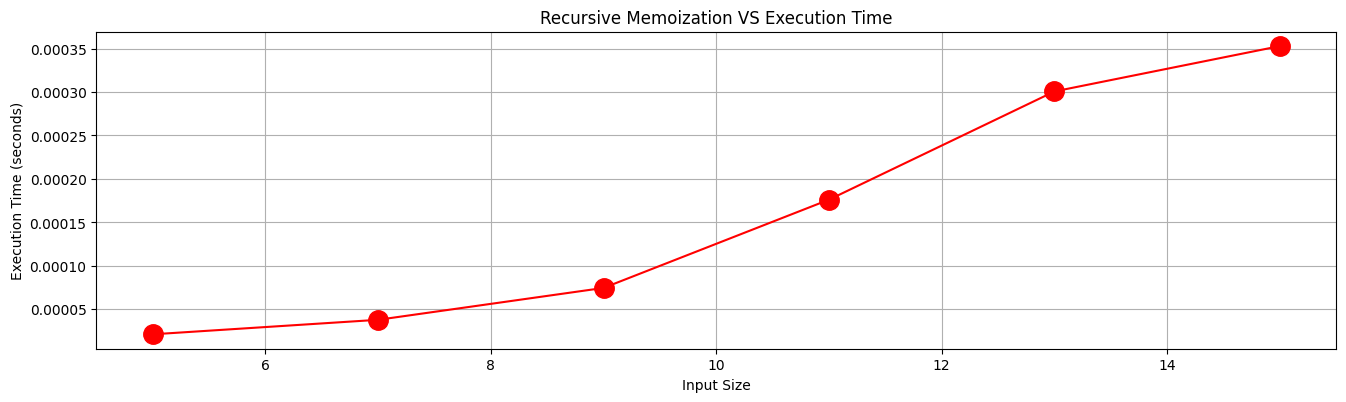

In [52]:
plt.figure(figsize=(14,10))
plt.subplot(3, 1, 1)
plt.plot(data_sizes,execution_times_recursive, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')
plt.grid(True)
plt.show()

plt.figure(figsize=(16,14))
plt.subplot(3, 1, 2)
plt.plot(data_sizes,  execution_times_memoization, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')
plt.grid(True)
plt.show()


    


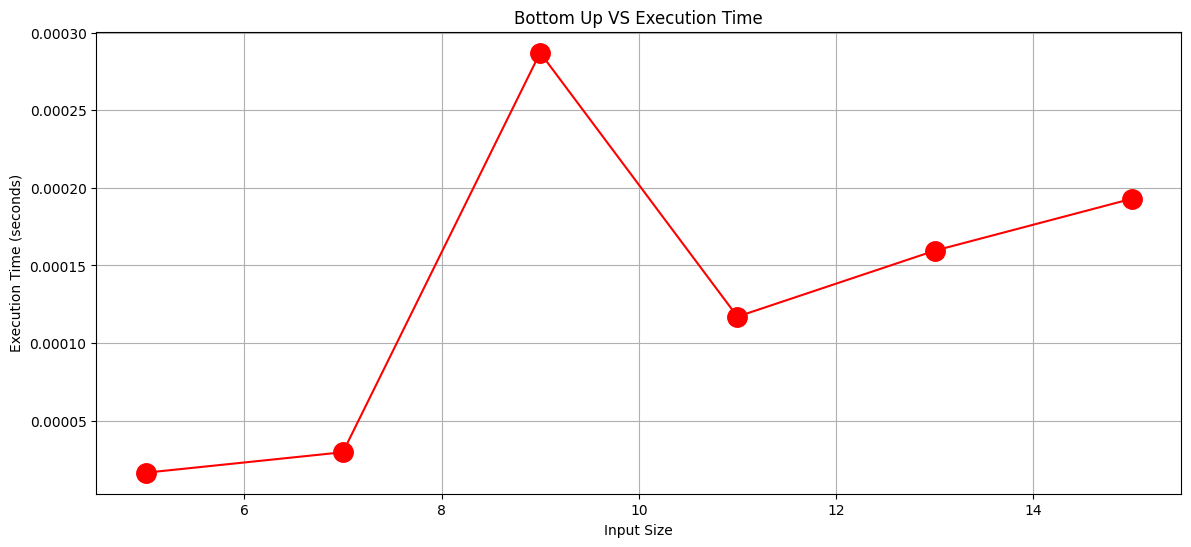

In [51]:
plt.figure(figsize=(14,6))
plt.plot(data_sizes, execution_times_bottom_up, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Bottom Up VS Execution Time')
plt.grid(True)
plt.show()

## No of CALLS Analysis


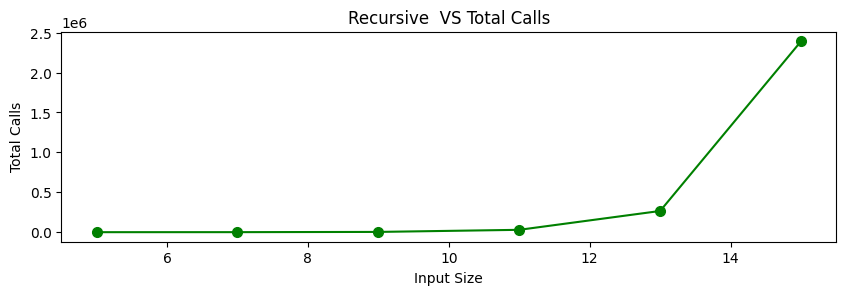

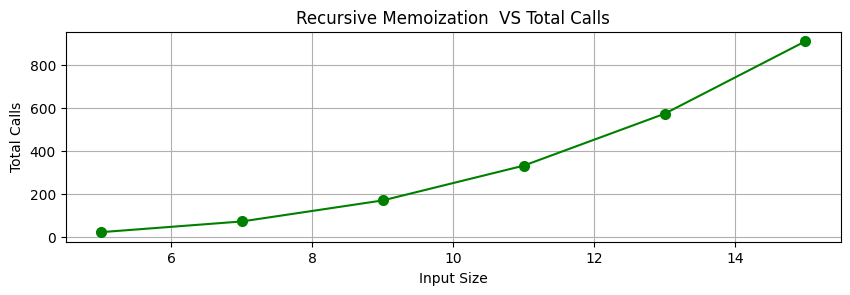

In [53]:

plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(data_sizes, total_calls_recursive, marker='o',color='g',markersize=7)
plt.xlabel('Input Size')
plt.ylabel('Total Calls')
plt.title('Recursive  VS Total Calls')


plt.figure(figsize=(10,6))
plt.subplot(2, 1, 2)
plt.plot(data_sizes, total_calls_memoization, marker='o',color='g',markersize=7)
plt.xlabel('Input Size')
plt.ylabel('Total Calls')
plt.title('Recursive Memoization  VS Total Calls')
plt.grid(True)
plt.show()


    

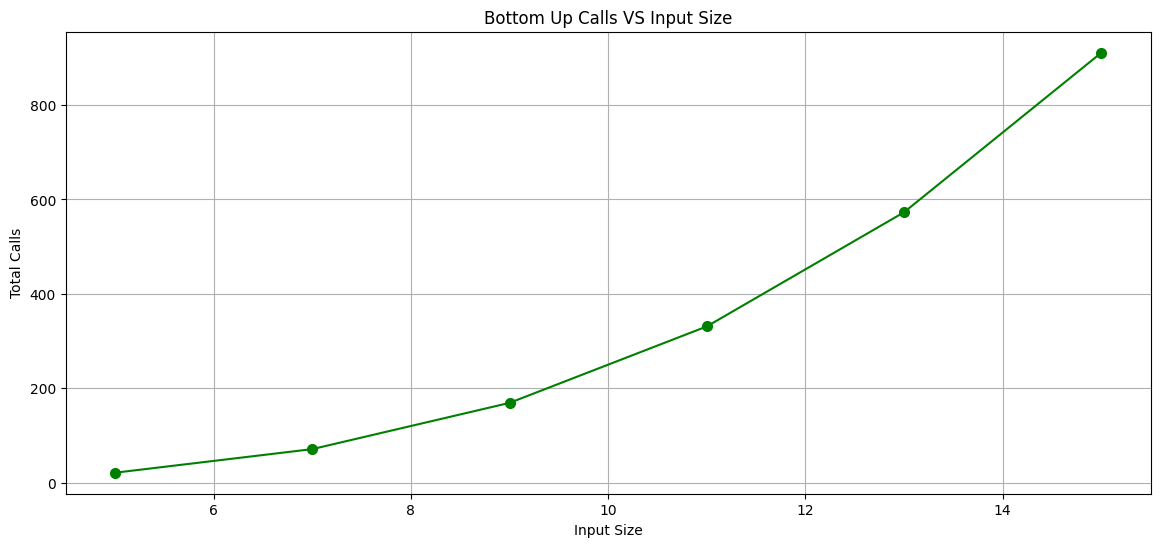

In [54]:
plt.figure(figsize=(14,6))
plt.plot(data_sizes, total_calls_bottom_up, marker='o',color='g',markersize=7)
plt.xlabel('Input Size')
plt.ylabel('Total Calls')
plt.title('Bottom Up Calls VS Input Size')
plt.grid(True)
plt.show()

DP ENTRIES:

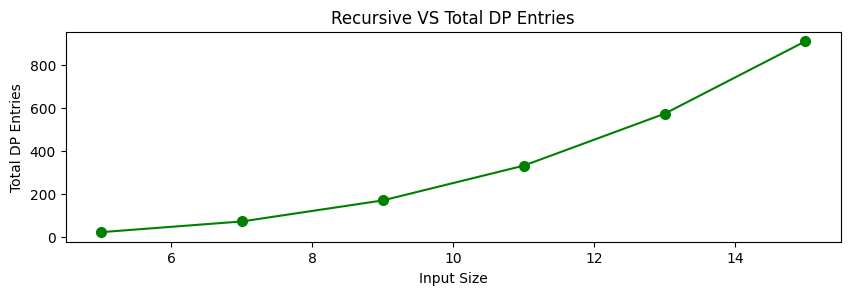

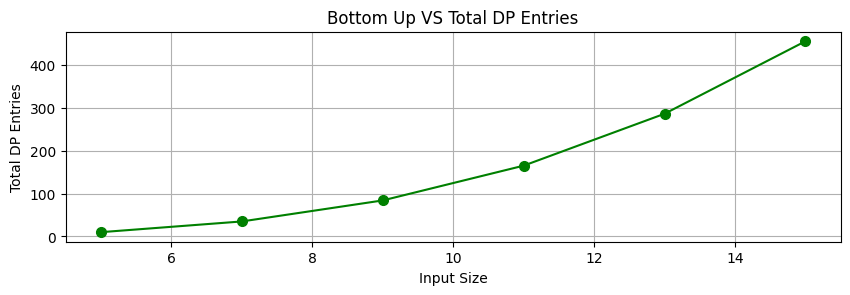

In [56]:

plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(data_sizes,  total_dp_memoization, marker='o',color='g',markersize=7)
plt.xlabel('Input Size')
plt.ylabel('Total DP Entries')
plt.title('Recursive VS Total DP Entries')
#  data3.append([total_dp_recursive[i],total_dp_memoization[i],total_dp_bottom_up[i]])
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 2)
plt.plot(data_sizes,  total_dp_bottom_up, marker='o',color='g',markersize=7)
plt.xlabel('Input Size')
plt.ylabel('Total DP Entries')
plt.title('Bottom Up VS Total DP Entries')
plt.grid(True)
plt.show()

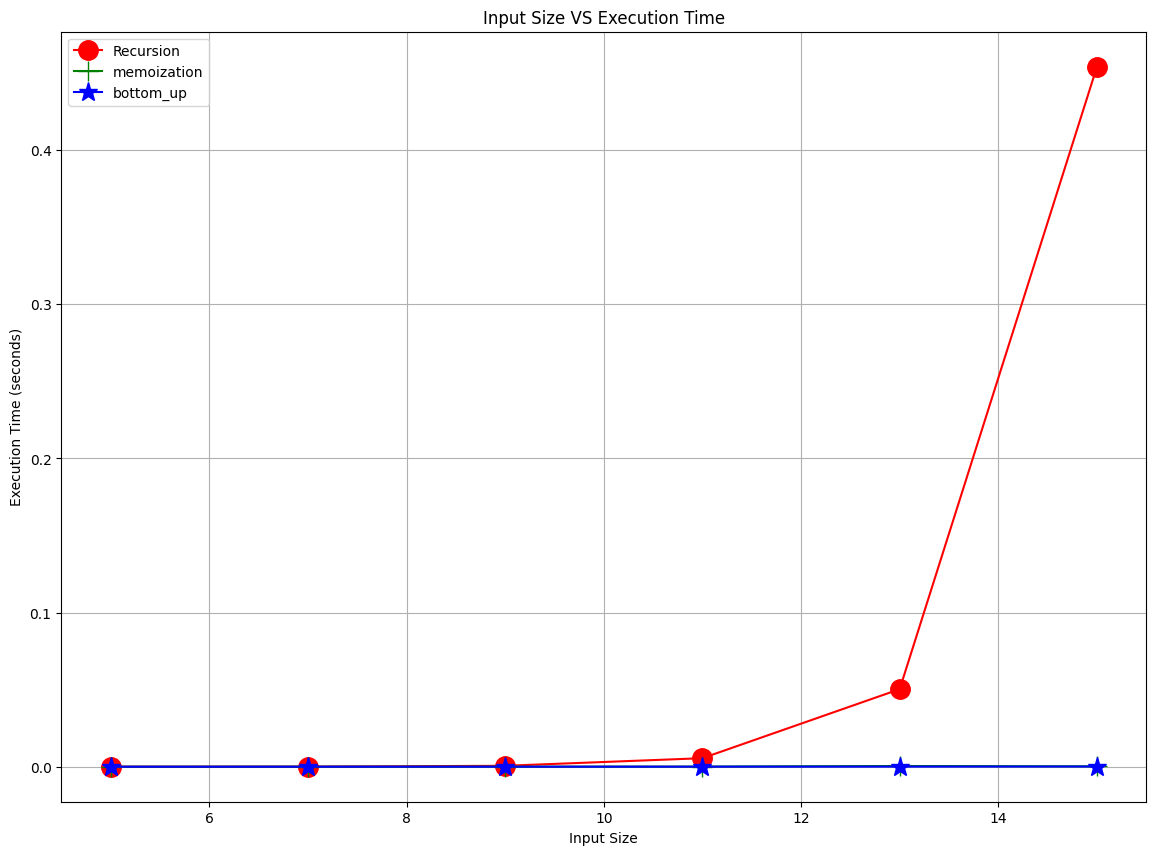

In [17]:
plt.figure(figsize=(14,10))
 
plt.plot(data_sizes,execution_times_recursive, marker='o',color='r',markersize=14,label='Recursion')
plt.plot(data_sizes,  execution_times_memoization, marker='+',color='g',markersize=14,label='memoization')
plt.plot(data_sizes, execution_times_bottom_up, marker='*',color='b',markersize=14,label='bottom_up')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Input Size VS Execution Time')
plt.grid(True)
plt.legend()
plt.show()

 

## Best Top Down TestCase

In [93]:
import time
import random

data_sizes = [1]
execution_times_recursive = []
execution_times_memoization = []
execution_times_bottom_up = []
total_calls_recursive = []
total_calls_memoization = []
total_calls_bottom_up = []
total_dp_recursive = []
total_dp_memoization = []
total_dp_bottom_up = []
array_used = []
for n in data_sizes:
    
    
    dimensions = [i for i in range(1,20)]
    print(f"Data Size: {n}")
    array_used.append(dimensions)
    # Recursive Algorithm
    
    start_time = time.perf_counter()
    result, calls = matrix_chain_recursive(dimensions, 1, n-1)
    end_time = time.perf_counter()
    print(f"Recursive Algorithm - Time: {end_time - start_time}, Calls: {calls}")
    execution_times_recursive.append(end_time - start_time)
    total_calls_recursive.append(calls)
    total_dp_recursive.append(calls)

    # Recursive with Memoization
    start_time = time.perf_counter()
    result, calls = matrix_chain_memoization(dimensions)
    end_time = time.perf_counter()
    print(f"Memoization - Time: {end_time - start_time}, Calls: {calls}")
    execution_times_memoization.append(end_time - start_time)
    total_calls_memoization.append(calls)
    total_dp_memoization.append(calls)
    total_calls_bottom_up.append(calls)

    # Bottom-Up DP
    start_time = time.perf_counter()
    result, calls = matrix_chain_bottom_up(dimensions)
    end_time = time.perf_counter()
    print(f"Bottom-Up DP - Time: {end_time - start_time}, DP Table Entries: {calls}\n")
    execution_times_bottom_up.append(end_time - start_time)
    
    
    total_dp_bottom_up.append(calls)
    
    


print(f"The Arrays used :")
for i in array_used:
    print(f"Size {len(i)} : {i}")

Data Size: 1
Recursive Algorithm - Time: 5.699999746866524e-06, Calls: 1
Memoization - Time: 8.600000001024455e-06, Calls: 3
Bottom-Up DP - Time: 6.000002031214535e-06, DP Table Entries: 1

The Arrays used :
Size 3 : [1, 2, 3]


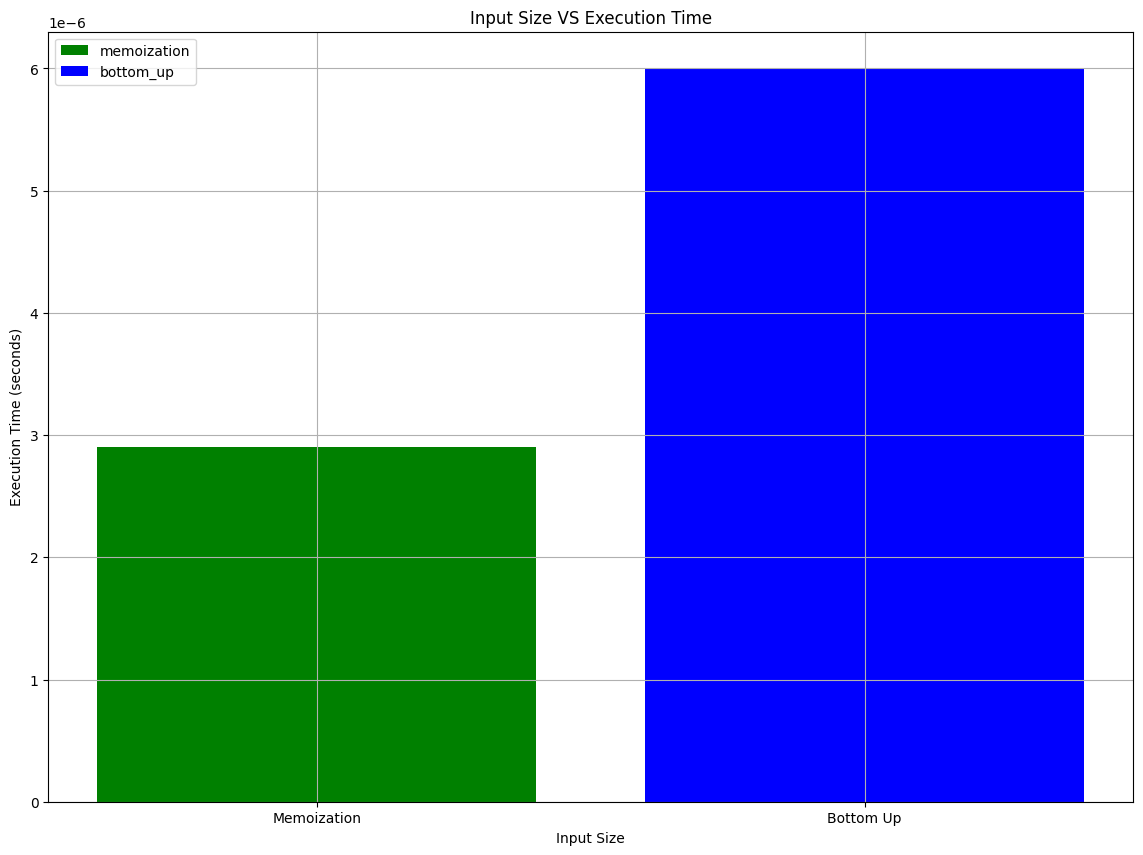

In [97]:

plt.figure(figsize=(14,10))
# execution_times_memoization[0]-=execution_times_recursive[0]/2
# plt.bar("Recursion",execution_times_recursive, color='r', label='Recursion')
plt.bar("Memoization",  execution_times_memoization, color='g',label='memoization')
plt.bar("Bottom Up", execution_times_bottom_up,  color='b',label='bottom_up')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Input Size VS Execution Time')
plt.grid(True)
plt.legend()
plt.show()

## Bottom UP Best Case

In [64]:
import time
import random

data_sizes = [1]
execution_times_recursive = []
execution_times_memoization = []
execution_times_bottom_up = []
total_calls_recursive = []
total_calls_memoization = []
total_calls_bottom_up = []
total_dp_recursive = []
total_dp_memoization = []
total_dp_bottom_up = []
array_used = []
for n in data_sizes:
    
    
    dimensions = [10,20,5,30,15]
    print(f"Data Size: {n}")
    array_used.append(dimensions)
    # Recursive Algorithm
    
    start_time = time.perf_counter()
    result, calls = matrix_chain_recursive(dimensions, 1, n-1)
    end_time = time.perf_counter()
    print(f"Recursive Algorithm - Time: {end_time - start_time}, Calls: {calls}")
    execution_times_recursive.append(end_time - start_time)
    total_calls_recursive.append(calls)
    total_dp_recursive.append(calls)

    # Recursive with Memoization
    start_time = time.perf_counter()
    result, calls = matrix_chain_memoization(dimensions)
    end_time = time.perf_counter()
    print(f"Memoization - Time: {end_time - start_time}, Calls: {calls}")
    execution_times_memoization.append(end_time - start_time)
    total_calls_memoization.append(calls)
    total_dp_memoization.append(calls)
    total_calls_bottom_up.append(calls)

    # Bottom-Up DP
    start_time = time.perf_counter()
    result, calls = matrix_chain_bottom_up(dimensions)
    end_time = time.perf_counter()
    print(f"Bottom-Up DP - Time: {end_time - start_time}, DP Table Entries: {calls}\n")
    execution_times_bottom_up.append(end_time - start_time)
    
    
    total_dp_bottom_up.append(calls)
    
    


print(f"The Arrays used :")
for i in array_used:
    print(f"Size {len(i)} : {i}")

Data Size: 1
Recursive Algorithm - Time: 1.1000003723893315e-05, Calls: 1
Memoization - Time: 1.920000067912042e-05, Calls: 21
Bottom-Up DP - Time: 1.1999996786471456e-05, DP Table Entries: 10

The Arrays used :
Size 5 : [10, 20, 5, 30, 15]


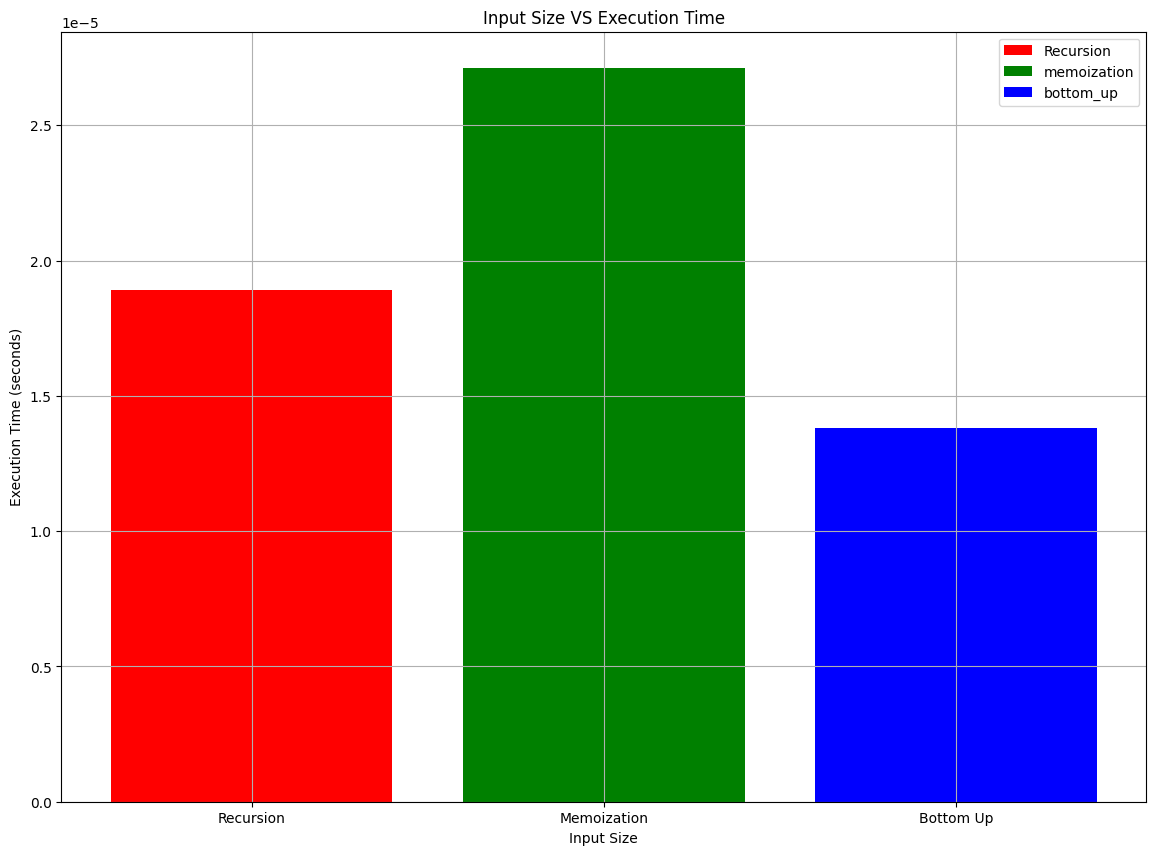

In [63]:

plt.figure(figsize=(14,10))

plt.bar("Recursion",execution_times_recursive, color='r', label='Recursion')
plt.bar("Memoization",  execution_times_memoization, color='g',label='memoization')
plt.bar("Bottom Up", execution_times_bottom_up,  color='b',label='bottom_up')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Input Size VS Execution Time')
plt.grid(True)
plt.legend()
plt.show()

In [74]:
dp_memo = [1,30,270,117,4851,30876]
dp_bottom_up = [10,45,300,1225,6050,42275]

data = []
for i in range(len(dp_memo)):
    data.append([dp_memo[i],dp_bottom_up[i]])


## DP Entries Comparision

In [75]:
df = pd.DataFrame(data,columns= ['dp_memo','dp_bottom_up'])
df

,dp_memo,dp_bottom_up
0,1,10
1,30,45
2,270,300
3,117,1225
4,4851,6050
5,30876,42275


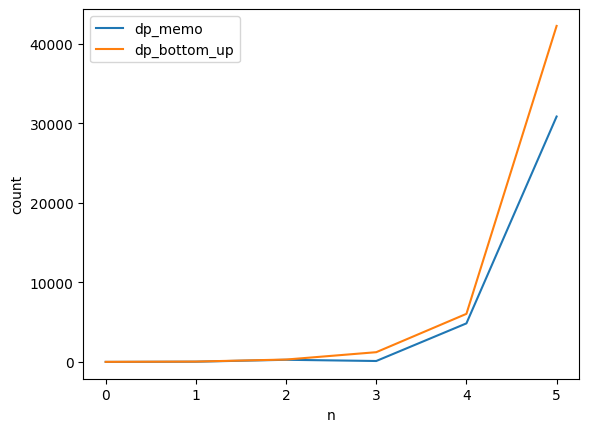

In [76]:
import matplotlib.pyplot as plt
plt.plot(df.index,df['dp_memo'],label='dp_memo')
plt.plot(df.index,df['dp_bottom_up'],label='dp_bottom_up')
plt.xlabel('n')
plt.ylabel('count')
plt.legend()
plt.show()

TOP Down - When Order of matrices are in ascending or descending order

Bottom Down - Mostly


25 input case max in my PC

